/Users/jeremyevers/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


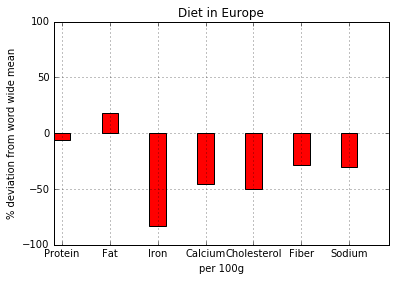

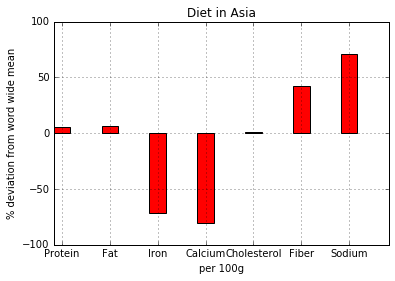

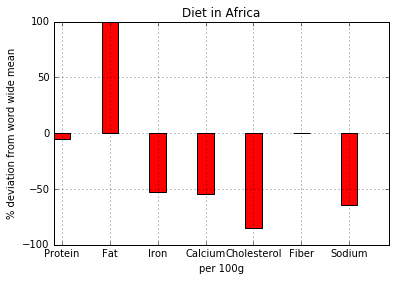

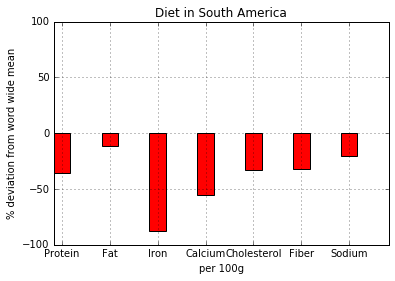

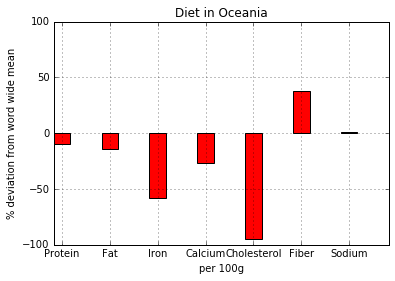

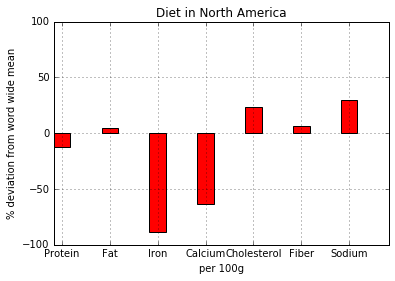

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Loading and preprocessing
food_facts = pd.read_csv('../FoodFacts.csv')
food_facts.countries = food_facts.countries.str.lower()
food_facts.countries = food_facts.countries.fillna('unknown country')

# Create all regions
regions = {
    'Europe': ['netherlands', 'holland', 'united kingdom', 'spain', 'en:uk', 'en:es', 'en:uk'],
    'Asia': ['china', 'japan', 'india', 'en:india'],
    'Africa': ['south africa'],
    'North America': ['united states', 'canada', 'mexico', 'en:us'],
    'South America': ['brazil', 'perú', 'argentina'],
    'Oceania': ['australia', 'new zealand']
}

# Set up all used variables
variables = {
    'Cholesterol': 'cholesterol_100g',
    'Fat': 'fat_100g',
    'Protein': 'proteins_100g',
    'Sodium' : 'sodium_100g',
    'Calcium' : 'calcium_100g',
    'Iron' : 'iron_100g',
    'Fiber' : 'fiber_100g'
}

# Calculate the percentual deviation from a against b
def calc_deviation(a, b):
    return (a - b) / b * 100

# Loop through all regions and make a plot per region
for region in regions:
    region_labels = regions[region]
    region_facts = food_facts[food_facts.countries.isin(region_labels)]

    deviations = []
    for variable in variables:
        attr = variables[variable]
        deviations.append(calc_deviation(getattr(region_facts, attr).mean(), getattr(food_facts, attr).mean()))

    indices = np.arange(len(variables))
    width = 0.35
    p1 = plt.bar(indices, deviations, width, color='r')

    plt.ylabel('% deviation from word wide mean')
    plt.xlabel('per 100g')
    plt.title('Diet in ' + region)
    plt.xticks(indices + width/2., variables.keys())
    plt.ylim([-100, 100])
    plt.grid(True, which='both')

    plt.show()